In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.graph_objects as go

from scipy.integrate import odeint

## Solving and Simuating SIR Model (Deterministic)

In [2]:
def sir_model(y0, t, params):
    S, I, R = y0

    beta = params[0]
    gamma = params[1]

    dSdt = -beta * S * I
    dIdt = (beta * S * I) - (gamma * I)
    dRdt = gamma * I 

    return [dSdt, dIdt, dRdt]


def get_infect_peaks(y, t):
    S, I, R = y.T

    # get peak infection and time at peak 
    peak_index = np.argmax(I)
    peak_time = t[peak_index]
    peak_value = I[peak_index]

    return [peak_value, peak_time]
    

def plot_solution(y, t, save=False, filename=''):
    """
    Plots S(t), I(t), and R(t) solutions

    Args:
    y : ndarray
        A NumPy array of shape (len(t), 3), where columns represent S(t), I(t), and R(t)
        Solutions of SIR ODE's from odeint()
    t : ndarray
        Time array corresponding to the rows of y
        This should align with the time array used to solve the ODEs
    save : Boolean
        Save plot as a png in the plots folder if True 
    filename : str 
        Name of the png file (if svae = True)

    Returns:
    fig : matplotlib.figure.Figure
        The figure object for further manipulation or saving
    """

    if not isinstance(y, np.ndarray):
        y = np.array(y)

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(t, y[:, 0], label='S(t)', linewidth=2)
    ax.plot(t, y[:, 1], label='I(t)', linewidth=2)
    ax.plot(t, y[:, 2], label='R(t)', linewidth=2)

    ax.set_title('SIR Model')
    ax.set_xlabel('Time (Days)')
    ax.set_ylabel('Proportion')
    ax.legend()
    ax.grid()

    if save: 
        fig.savefig(f'C:/Users/leena/math111a/plots/{filename}.png')
        print(f'Plot saved as {filename}.png')

    return fig 


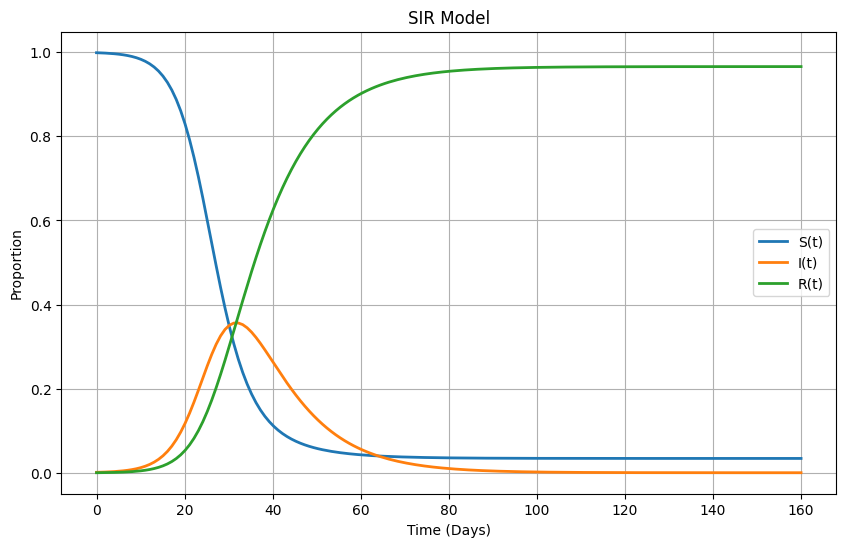

In [3]:
# INITIAL CONDITIONS
I0 = 0.001      # 0.1% pop infected
R0 = 0 
S0 = 1.0 - I0 - R0 

y0 = [S0, I0, R0]

beta = 0.35     # transmission rate 
gamma = 0.1     # recovery rate 
params = [beta, gamma]

# TIME GRID
t = np.linspace(0, 160, num=160) 

# SOLVE ODE 
y = odeint(sir_model, y0, t, args=(params,))
y = np.array(y)

fig = plot_solution(y, t)
plt.show()

### Simulating SIR for varying $\beta$ (and $R_0$)

In [4]:
# initial conditions and gamma FIXED 
I0 = 0.001
R0 = 0.0
S0 = 1.0 - I0 - R0
y0 = [S0, I0, R0]

gamma = 0.1

t = np.linspace(0, 160, 160)

# varying betas 
betas = np.linspace(0.05, 0.6, 100)

peak_times = []
peak_infects = []

# solve ODE's for each beta 
for beta in betas: 
    params = [beta, gamma]
    y = odeint(sir_model, y0, t, args=(params,))
    stats = get_infect_peaks(y, t)
    peak_infects.append(stats[0])
    peak_times.append(stats[1])

betas_df = pd.DataFrame({'beta': betas, 'peak_infect_prop': peak_infects, 'peak_day': peak_times})
betas_df['ro'] = betas_df['beta'] / gamma
betas_df.head()

,beta,peak_infect_prop,peak_day,ro
0,0.050000,0.001,0.0,0.500000
1,0.055556,0.001,0.0,0.555556
2,0.061111,0.001,0.0,0.611111
3,0.066667,0.001,0.0,0.666667
4,0.072222,0.001,0.0,0.722222


In [5]:
# plotting 
fig = px.scatter(betas_df, x='ro', y='peak_day')

fig.update_layout(
    xaxis_title = 'Ro',
    yaxis_title = 'Infection Peak Day',
    plot_bgcolor = 'white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    title = 'Max I(t) Day across Varying R0'
)

fig.update_traces(marker=dict(size=6))

fig.show()

In [ ]:
fig = px.scatter(betas_df, x='ro', y='peak_infect_prop')

fig.update_layout(
    xaxis_title = 'Basic Reproductive Number (R_0)',
    yaxis_title = 'Max Infected Proportion',
    plot_bgcolor = 'white',
    xaxis=dict(showgrid=True, gridcolor='lightgray'),
    yaxis=dict(showgrid=True, gridcolor='lightgray'),
    title = 'Max I(t) across Varying R0'
)

fig.update_traces(marker=dict(size=6))

fig.show()

# save plot
# fig.write_image("C:/Users/leena/math111a/plots/max_i(t)_R0.png")

### Basic Reproduction Number $R_0$

#### How does the SIR look for $R_0$ < 1 ?

C:\Users\leena\AppData\Local\Temp\ipykernel_23456\380733399.py:16: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



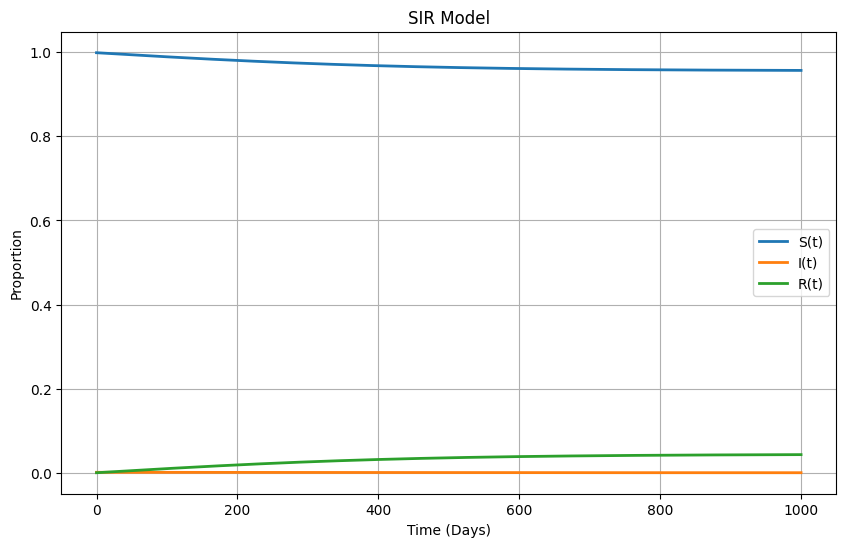

In [77]:
I0 = 0.001
R0 = 0.0
S0 = 1.0 - I0 - R0
y0 = [S0, I0, R0]

gamma = 0.1
beta = 0.1 
params = [beta, gamma]

t = np.linspace(0, 1000, 1000)

# SOLVE 
y = odeint(sir_model, y0, t, args=(params,))
# PLOT 
fig = plot_solution(y, t)
fig.show()

As expected, infections will not grow is $R_0 = 1$, so the number of infected will grow very slowly. Consequently, the number of susepctibles and recovered will already change very slowly.

### Visualizing S(t), I(t), R(t) Across varying $R_0$ (with $R_0 > 1$)

##### Here we'll plot 8 SIR models with $R_0$ ranging from 1.5-5, using a constant $\gamma$

In [120]:
# initial conditions 
I0 = 0.001
R0 = 0.0
S0 = 1.0 - I0 - R0
y0 = [S0, I0, R0]

t = np.linspace(0, 160, 160)
gamma = 0.1

r0s= np.linspace(1.5, 5, 8)
betas = r0s * gamma

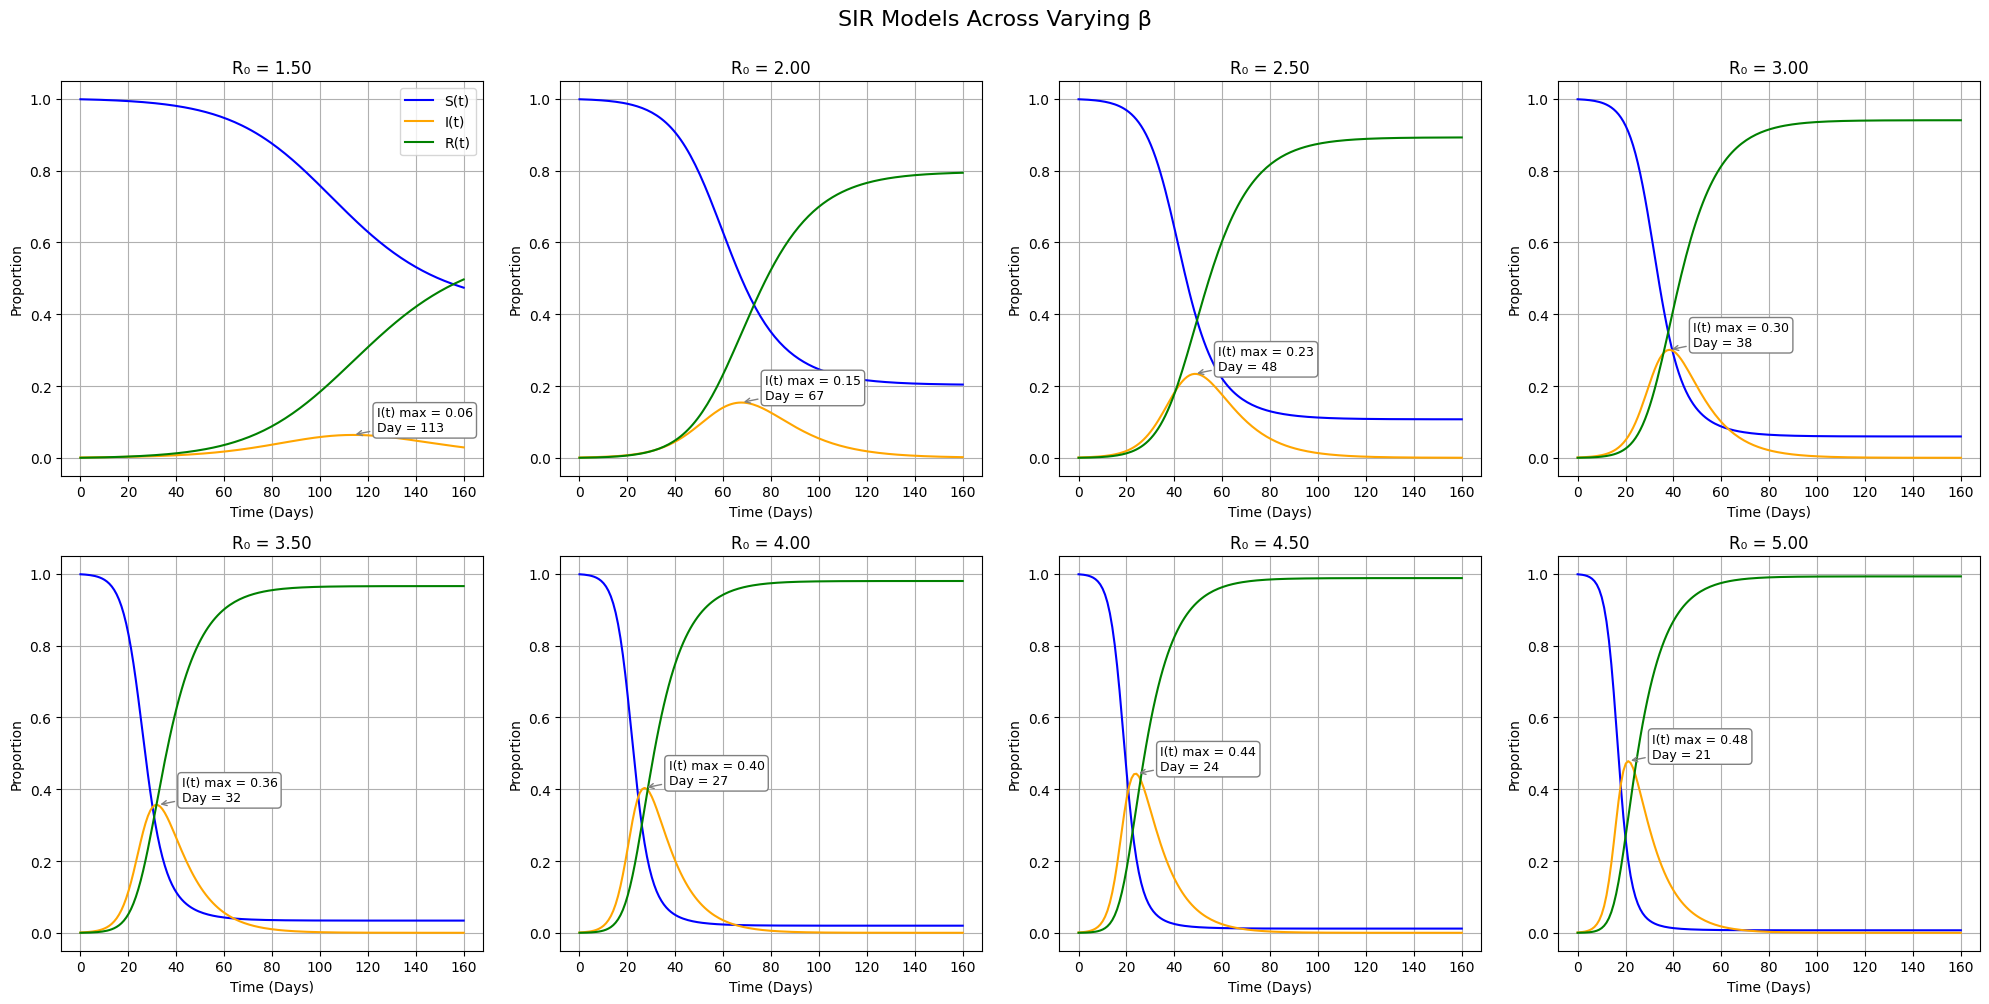

Plot saved


In [121]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten() # for easy indexing 

for i, beta in enumerate(betas): 
    params = [beta, gamma]
    y = odeint(sir_model, y0, t, args=(params,))
    y = np.array(y)

    peak_stats = get_infect_peaks(y, t)
    I_max = peak_stats[0]
    t_max = peak_stats[1]

    # plot subplot 
    ax = axes[i]
    ax.plot(t, y[:, 0], label='S(t)', color='blue')
    ax.plot(t, y[:, 1], label='I(t)', color='orange')
    ax.plot(t, y[:, 2], label='R(t)', color='green')

    # add annotation
    ax.annotate(
        f"I(t) max = {I_max:.2f}\nDay = {int(t_max)}",
        xy=(t_max, I_max),
        xytext=(t_max + 10, I_max + 0.01),
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white'),
        arrowprops=dict(arrowstyle="->", color='gray'),
        fontsize=9
    )

    # update layout
    ax.set_title(f"R₀ = {beta/gamma:.2f}")
    ax.set_xlabel("Time (Days)")
    ax.set_ylabel("Proportion")
    ax.grid()

    if i == 0: 
        ax.legend()

plt.suptitle("SIR Models Across Varying β", fontsize=16, y=1.0)
plt.tight_layout()
plt.show()

# save plot 
# fig.savefig('C:/Users/leena/math111a/plots/sir_varying_beta.png')
# print('Plot saved')

### What if we change $\gamma$ instead?

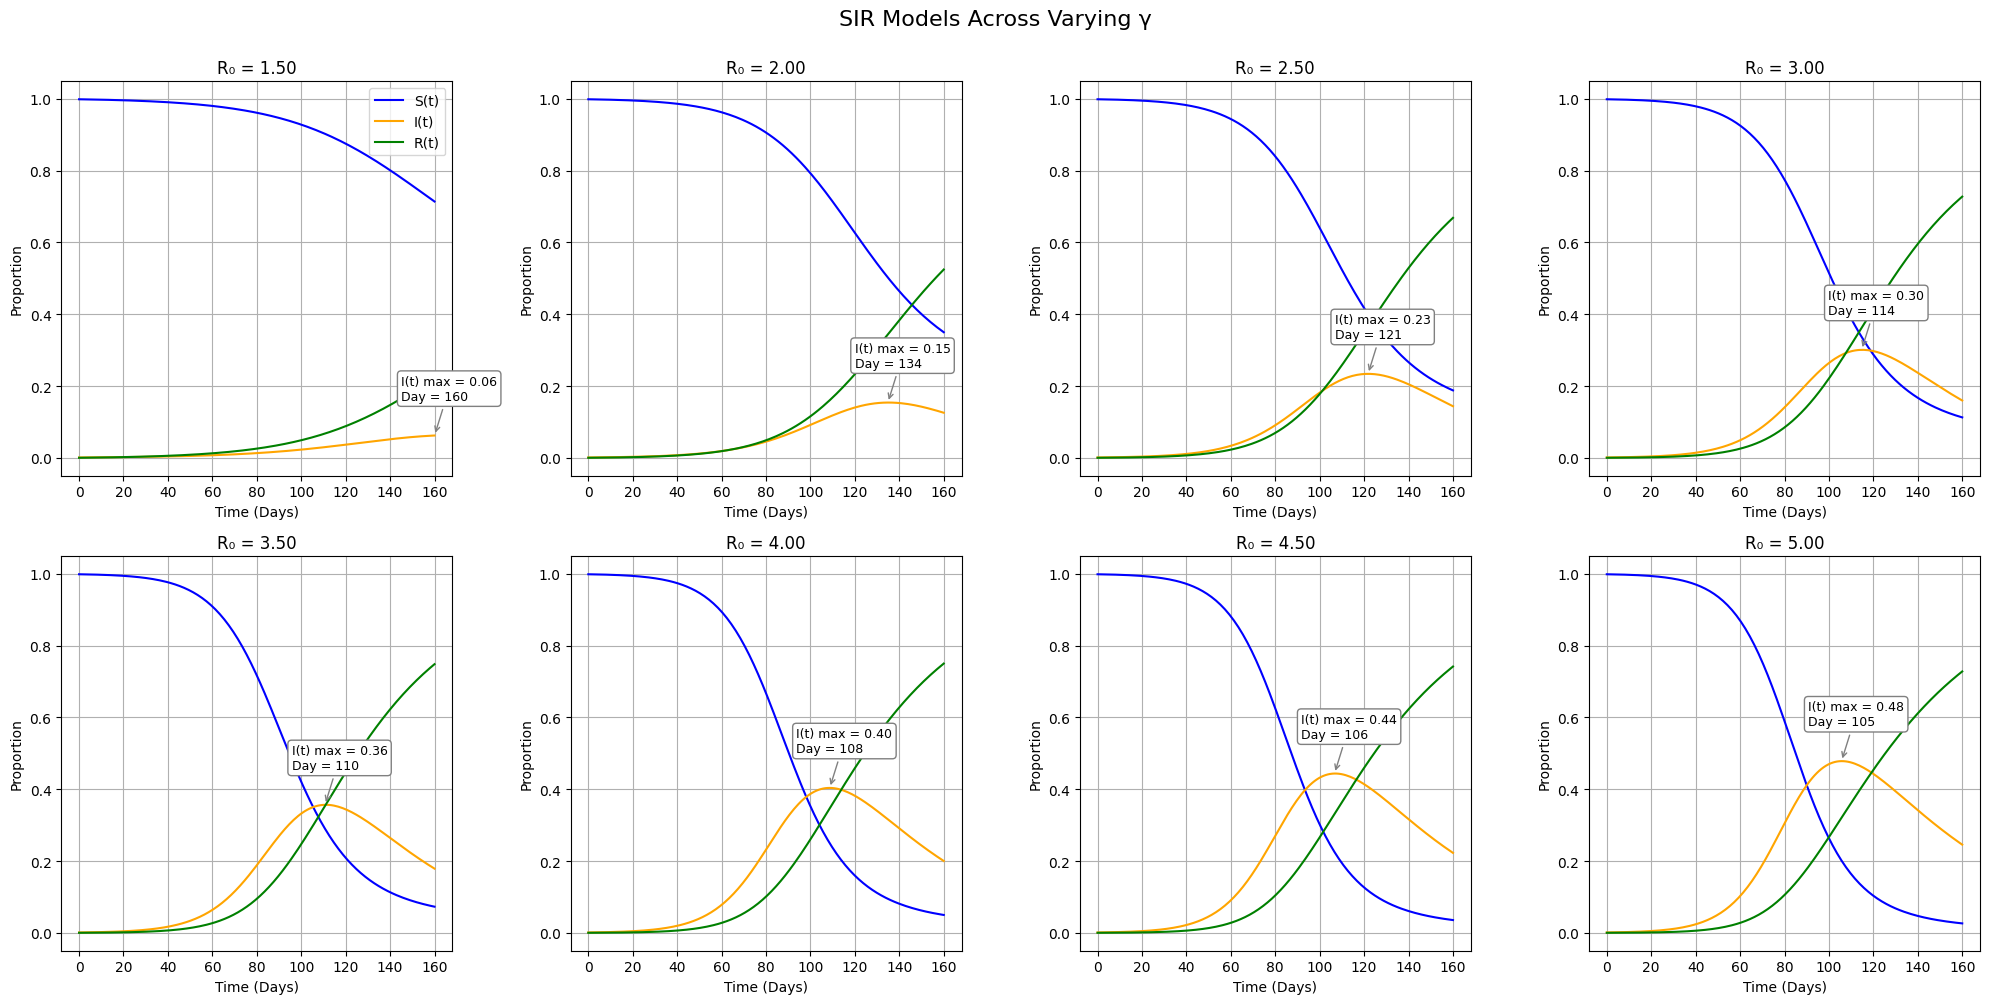

Plot saved


In [ ]:
# initial conditions 
I0 = 0.001
R0 = 0.0
S0 = 1.0 - I0 - R0
y0 = [S0, I0, R0]

t = np.linspace(0, 160, 160)
beta = 0.1

r0s= np.linspace(1.5, 5, 8)
gammas = beta / r0s

# PLOTTING
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten() # for easy indexing 

for i, gamma in enumerate(gammas): 
    params = [beta, gamma]
    y = odeint(sir_model, y0, t, args=(params,))
    y = np.array(y)

    peak_stats = get_infect_peaks(y, t)
    I_max = peak_stats[0]
    t_max = peak_stats[1]

    # plot subplot 
    ax = axes[i]
    ax.plot(t, y[:, 0], label='S(t)', color='blue')
    ax.plot(t, y[:, 1], label='I(t)', color='orange')
    ax.plot(t, y[:, 2], label='R(t)', color='green')

    # add annotation
    ax.annotate(
        f"I(t) max = {I_max:.2f}\nDay = {int(t_max)}",
        xy=(t_max, I_max),
        xytext=(t_max - 15, I_max + 0.1),
        bbox=dict(boxstyle="round,pad=0.3", edgecolor='gray', facecolor='white'),
        arrowprops=dict(arrowstyle="->", color='gray'),
        fontsize=9
    )

    # update layout
    ax.set_title(f"R₀ = {beta/gamma:.2f}")
    ax.set_xlabel("Time (Days)")
    ax.set_ylabel("Proportion")
    ax.grid()

    if i == 0: 
        ax.legend()

plt.suptitle("SIR Models Across Varying γ", fontsize=16, y=1.0)
plt.tight_layout()
plt.show()

# save plot 
# fig.savefig('C:/Users/leena/math111a/plots/sir_varying_gamma.png')
# print('Plot saved')


### Comparing trends from changing $\beta$ and $\gamma$

For both graphs, we see that as $R_0$ increases: 
- Peak of infection $I(t)$ becomes higher
- The peak occurs eariler in time 
- $S(t)$ drops more rapidly faster 
- $R(t)$ increases steeply faster 

While we see that $R_0$ governs **how much a disease spreads**, the values $\beta$ and $\gamma$ individually controls the timescale of that spread, thus $R_0$ does not inform us how fast an infection occurs
- Increasing transmission rate ($\beta$) with fixed $\gamma$ will lead to infections spreading faster, yet with a constant recovery rate, as reflected with shorter and faster outbreaks as $\beta$ increases in Figure 1. 
- Decreasing recovery rate ($\gamma$) with fixed $\beta$ leads to infections lingering longer for each individual, resulting in a slower, more 'stretched out' outbreak as reflected in Figure 2. 